<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/%20CreditScoring/curva_temporal_con_Gompertz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimación de curva de temporal

In [16]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [17]:
# Datos para 202208
data = [0,	0.000333333,	0.0015,	0.020166667,	0.035833333,	0.050333333,	0.066166667,	0.079666667,	0.0925,	0.102666667,	0.112833333,	0.123666667,	0.133666667]

# Tiempo (meses)
t = np.arange(len(data))

# Función de Gompertz
def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

# Ajuste de la función de Gompertz
popt, _ = curve_fit(gompertz, t, data, p0=[max(data), 1, 0.1])



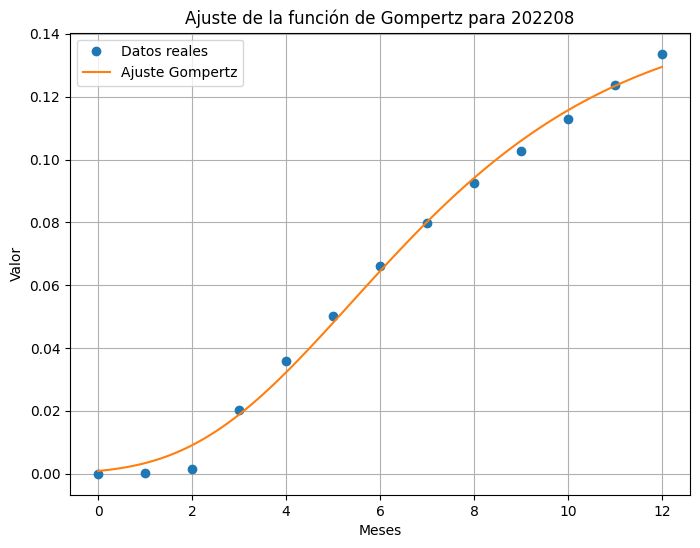

In [18]:
# visualización
t_fit = np.linspace(0, len(data)-1, 100)
data_fit = gompertz(t_fit, *popt)

plt.figure(figsize=(8, 6))
plt.plot(t, data, 'o', label='Datos reales')
plt.plot(t_fit, data_fit, '-', label='Ajuste Gompertz')
plt.title('Ajuste de la función de Gompertz para 202208')
plt.xlabel('Meses')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

Estimación sobre datos nuevos

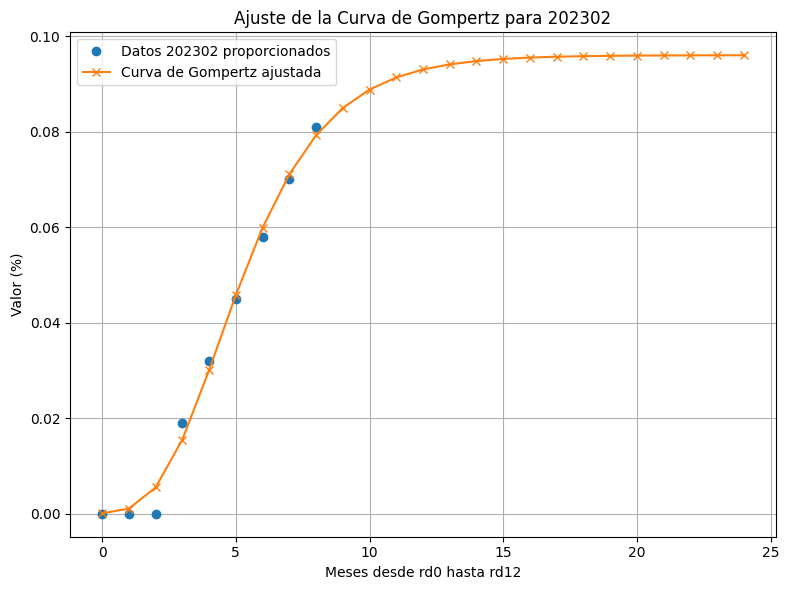

In [19]:
# Datos de 202302
data_202302 = [0, 0, 0, 0.01900, 0.03200, 0.04500, 0.05800, 0.07000, 0.08100]
t_202302 = np.arange(len(data_202302))

# Ajuste de la curva de Gompertz
popt, _ = curve_fit(gompertz, t_202302, data_202302, maxfev=10000)

# Usando el modelo Gompertz ajustado para obtener toda la curva
t_complete = np.arange(25)  # Desde rd0 hasta rd12 (inclusive)
complete_curve_202302 = gompertz(t_complete, *popt)

# Visualización
plt.figure(figsize=(8, 6))
plt.plot(t_202302, data_202302, 'o', label='Datos 202302 proporcionados')
plt.plot(t_complete, complete_curve_202302, 'x-', label='Curva de Gompertz ajustada')
plt.title('Ajuste de la Curva de Gompertz para 202302')
plt.xlabel('Meses desde rd0 hasta rd12')
plt.ylabel('Valor (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()